# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
torch.tensor([3]) // 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  """Entry point for launching an IPython kernel.


tensor([1])

In [ ]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Create the data parameters
start = 0
end = 1
step = 0.01

weight = 0.3
bias = 0.9 

# Make X and y using linear regression feature
X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [ ]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split] 
X_test,y_test = X[train_split:],y[train_split:]

In [ ]:
# Plot the training and testing data 
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):

  plt.figure(figsize=(10,8))

  plt.scatter(X_train,y_train,c='b',s=4,label='Training Data')

  plt.scatter(X_test,y_test,c='r',s=4,label='Testing Data')

  if predictions is not None:
    plt.scatter(X_test,predictions,c='g',s=4,label='Inference')


  plt.legend(prop={"size" : 4})

  



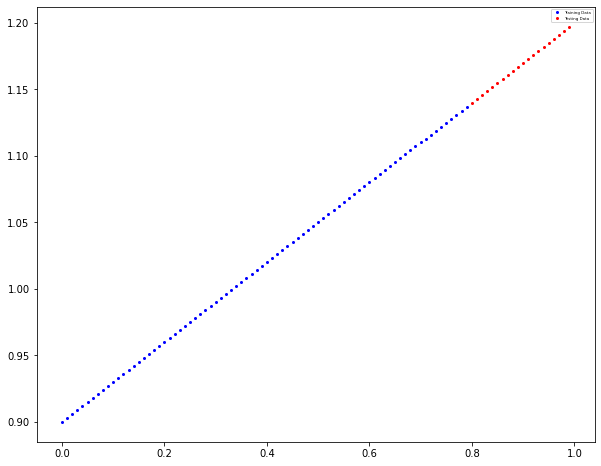

In [ ]:
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test)

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,dtype=torch.float32),requires_grad=True)

    self.bias = nn.Parameter(torch.rand(1,dtype=torch.float32),requires_grad=True)


  def forward(self,x):
    return self.weights * x + self.bias

In [ ]:
# Instantiate the model and put it to the target device
model = LinearRegression().to(device)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer
l1_loss = nn.L1Loss()

optim = torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300


# Send data to target device
X_train,y_train,X_test,y_test = X_train.to(device),y_train.to(device),X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  
  model.train()

  # 1. Forward pass

  preds = model(X_train)
  

  # 2. Calculate loss
  loss = l1_loss(preds,y_train)

  # 3. Zero gradients
  
  optim.zero_grad()

  # 4. Backpropagation

  loss.backward()
  

  # 5. Step the optimizer

  optim.step()
  

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 

    model.eval()

    with torch.inference_mode():
    
      # 1. Forward pass

      test_pred = model(X_test)
      
      # 2. Calculate test loss

      test_loss = l1_loss(test_pred,test_pred)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.245 | Test loss: 0.000
Epoch: 20 | Train loss: 0.116 | Test loss: 0.000
Epoch: 40 | Train loss: 0.091 | Test loss: 0.000
Epoch: 60 | Train loss: 0.083 | Test loss: 0.000
Epoch: 80 | Train loss: 0.076 | Test loss: 0.000
Epoch: 100 | Train loss: 0.069 | Test loss: 0.000
Epoch: 120 | Train loss: 0.062 | Test loss: 0.000
Epoch: 140 | Train loss: 0.055 | Test loss: 0.000
Epoch: 160 | Train loss: 0.048 | Test loss: 0.000
Epoch: 180 | Train loss: 0.041 | Test loss: 0.000
Epoch: 200 | Train loss: 0.035 | Test loss: 0.000
Epoch: 220 | Train loss: 0.028 | Test loss: 0.000
Epoch: 240 | Train loss: 0.021 | Test loss: 0.000
Epoch: 260 | Train loss: 0.014 | Test loss: 0.000
Epoch: 280 | Train loss: 0.007 | Test loss: 0.000


In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.3040], device='cuda:0')),
             ('bias', tensor([0.8955], device='cuda:0'))])

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model
model.eval()
with torch.inference_mode():

  test_pred = model(X_test)

In [ ]:
test_pred = test_pred.cpu().numpy()

In [ ]:
X_train,y_train,X_test,y_test = X_train.to('cpu'),y_train.to('cpu'),X_test.to('cpu'),y_test.to('cpu')

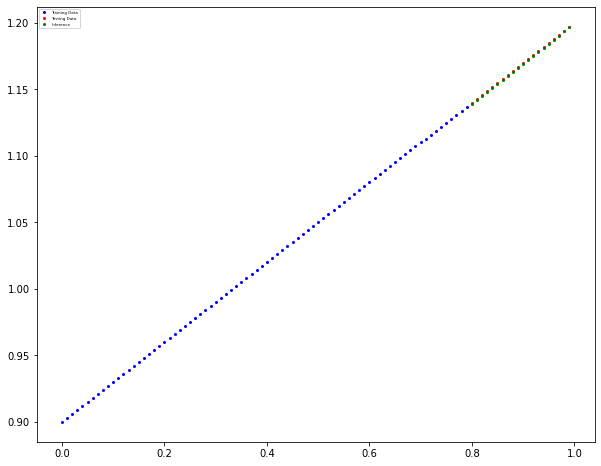

In [ ]:
# Plot the predictions (these may need to be on a specific device)

plot_predictions(train_data=X_train.to('cpu'),train_labels=y_train.to('cpu'),test_data=X_test.to('cpu'),test_labels=y_test.to('cpu'),predictions=test_pred)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory 

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True) 



# 2. Create model save path 
MODEL_NAME = '01_pytorch_workflow_exercise.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model at Location : {MODEL_SAVE_PATH}")
torch.save(model.state_dict(),MODEL_SAVE_PATH)

Saving model at Location : models/01_pytorch_workflow_exercise.pth


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
new_model = LinearRegression()

new_model.to(device)

new_model.load_state_dict(torch.load(MODEL_SAVE_PATH,map_location=device))

new_model.state_dict()

OrderedDict([('weights', tensor([0.3040], device='cuda:0')),
             ('bias', tensor([0.8955], device='cuda:0'))])

In [ ]:
# Make predictions with loaded model and compare them to the previous
new_model.eval()

with torch.inference_mode():

  test_pred_new = new_model(X_test.to(device)) 

test_pred_new == test_pred


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')